## Trabalho de Sistemas Térmicos

#### Memória de Cálculo do Estudo de Caso de Ciclo de Rankine com Modificações

---

##### Alunos: Abner Vieira Pereira (1923495GMEC) e Caio Henrique de Souza Volotão  (2122424GMEC)


In [1]:
from numpy import *
import numpy as np
from sympy import *
import sympy as sy
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from IPython.display import Math,Image
from pandas import *
import pandas as pd
from adjustText import adjust_text
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
from IPython.display import Image

### Ciclo de potência proposto

O Ciclo de Rankine é um ciclo termodinâmico amplamente utilizado na geração de energia elétrica em usinas termelétricas. Seu princípio de funcionamento consiste basicamente em converter energia térmica em trabalho mecânico por meio de um fluido de trabalho, geralmente vapor d’água, que passa por processos de aquecimento, expansão, condensação e bombeamento. No ciclo modificado, melhorias como reaquecimento, expansão em dois estágios e regeneração de calor são introduzidas para aumentar a eficiência térmica.

No sistema proposto, ilustrado na figura abaixo, o fluido de trabalho é vapor d’água e opera sob diferentes condições de pressão e temperatura em múltiplas correntes. As modificações do ciclo incluem uma expansão em estágios múltiplos com reaquecimento entre as turbinas, permitindo maior aproveitamento da energia do vapor e reduzindo a umidade na fase final da expansão. Além disso, a regeneração de calor melhora o desempenho, aumentando a temperatura do líquido antes da vaporização, reduzindo o consumo energético na caldeira.

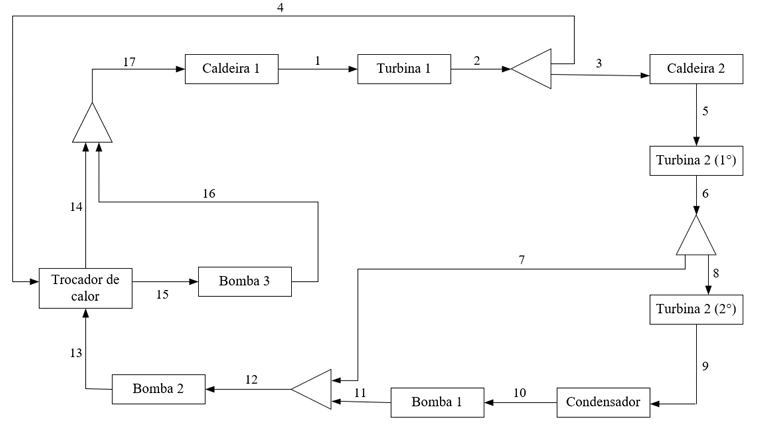

In [2]:
Image('ciclo.png')

### **Dados de Entrada do Ciclo de Rankine Modificado**

Os tados de entrada fornecidos para a resolução do estudo de caso estão expostos abaixo:

| **Corrente** | **Vazão Mássica (kg/h)**      | **Pressão (kPa)** | **Temperatura (°C)**     |
|-------------|--------------------------------|-------------------|-------------------------|
| 1           | 10.000                         | 15.000            | 600                     |
| 2           | -                              | 4.000             | -                       |
| 3           | 82% da corrente 2              | 4.000             | 600                     |
| 6           | -                              | 500               | -                       |
| 7           | 13% da corrente 6              | -                 | -                       |
| 9           | -                              | 10                | -                       |
| 10          | -                              | -                 | Líquido Saturado        |
| 11          | -                              | 500               | -                       |
| 13          | -                              | 15.000            | -                       |
| 15          | -                              | -                 | Líquido Saturado        |
| 16          | -                              | 15.000            | -                       |



### Corrente de matéria 1 - Entrada da turbina/Saída da caldeira 1

In [3]:
m1_ponto = (1e4/3600)   #kg/s
p1 = 15000e3            #Pa
T1 = 600 + 273.15       #K
fluido_trabalho = 'water'

In [4]:
h1 = CP.PropsSI('H','P',p1,'T',T1,fluido_trabalho)
h1_conv = h1/1e3

s1 = CP.PropsSI('S','P',p1,'T',T1,fluido_trabalho)
s1_conv = s1/1e3

T1 = CP.PropsSI('T','P',p1,'T',T1,fluido_trabalho)
T1_conv = T1 - 273.15

display(Math(r'h_1 = %.3f \text{ kJ/kg}.'%h1_conv))
display(Math(r's_1 = %.3f \text{ kJ/kgK}.'%s1_conv))
display(Math(r'T_1 = %.3f \text{ °C}.'%T1_conv))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 2 - Saída da turbina / Entrada do spliter

Nesse estado, a transformação é isentrópica, ou seja s1 = s2.

In [5]:
# Definindo as propriedades conhecidas

s2 = s1
s2_conv = s2/1e3
p2 = 4000e3

h2 = CP.PropsSI('H','S',s2,'P',p2,fluido_trabalho)
h2_conv = h2/1e3

T2 = CP.PropsSI('T','S',s2,'P',p2,fluido_trabalho)
T2_conv = T2 - 273.15

display(Math(r'T_2 = %.3f \text{ °C}.'%T2_conv))
display(Math(r'h_2 = %.3f \text{ kJ/kg}.'%h2_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Trabalho da turbina 1

In [6]:
Wt_1 = m1_ponto * (h1_conv - h2_conv)
display(Math(r'\dot{W}_{t,1} = %.3f \text{ kW}.'%Wt_1))

<IPython.core.display.Math object>

### Corrente de matéria 3 - Saída do spliter/Entrada da caldeira 2

Nesse estado, o fluido de trabalho passou por um Spliter, no qual 82% da linha 1 passa para a linha 3, enquanto 18% passa para a linha 4. O Spliter é um material que tem a função unicamente de dividir a matéria em um ciclo de potência ideal, dessa forma, desconsidera-se perdas de carga e assumi-se que a temperatura nas linhas 3 e 4 é a mesma da 2.

In [7]:
p3 = 4000e3                  #Pa
T3 = T2
T3_conv = T2_conv

m3_ponto = 0.82 * m1_ponto   # Corrente de matéria em 3 é 82% da corrente 1

h3 = CP.PropsSI('H','T',T2,'P',p3,fluido_trabalho)
h3_conv = h3/1e3

s3 = CP.PropsSI('S','T',T2,'P',p3,fluido_trabalho)
s3_conv = s3/1e3


display(Math(r'\dot{m}_{H_2O} = %.3f \text{ kg/s}.'%m3_ponto))
display(Math(r'h_3 = %.3f \text{ kJ/kg}.'%h3_conv))
display(Math(r's_3 = %.3f \text{ kJ/kgK}.'%s3_conv))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 4 - Saída do spliter/Entrada do trocador de calor

Nessa corrente, apenas 18% do fluxo da corrente 2 passa. Além disso, todas as outras propriedades permanecem as mesmas.

In [8]:
m4_ponto = 0.18 * m1_ponto
p4 = p3
T4_conv = T3_conv

h4 = h3
h4_conv = h3_conv

s4_conv = s3_conv

display(Math(r'\dot{m}_{4} = %.3f \text{ kg/s}.'%m4_ponto))
display(Math(r'h_4 = %.3f \text{ kJ/kg}.'%h4_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 5 - Saída da caldeira 2/Entrada da turbina 2(1°)

Nesse estágio, o fluido experimenta um salto entálpico, devido ao fornecimento de calor a pressão constante na caldeira. Dessa forma, conhece-se o valor da pressão e da temperatura nesse estado.

In [9]:
T5 = 600 + 273.15   #K
T5_conv = T5 - 273.15

p5 = 4000e3         #Pa

h5 = CP.PropsSI('H','T',T5,'P',p5,fluido_trabalho)
h5_conv = h5/1e3
s5 = CP.PropsSI('S','T',T5,'P',p5,fluido_trabalho)
s5_conv = s5/1e3

display(Math(r'h_5 = %.3f \text{ kJ/kg}.'%h5_conv))
display(Math(r's_5 = %.3f \text{ kJ/kgK}.'%s5_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Calor fornecido pela caldeira 2

In [10]:
Qcald_2 = m3_ponto * (h5_conv - h3_conv)
display(Math(r'\dot{Q}_{cald,2} = %.3f \text{ kW}.'%Qcald_2))

<IPython.core.display.Math object>

### Corrente de matéria 6 - Saída da turbina 2 (1°)/Entrada do spliter

In [11]:
s6 = s5
s6_conv = s6/1e3
p6 = 500e3

h6 = CP.PropsSI('H','S',s6,'P',p6,fluido_trabalho)
h6_conv = h6/1e3

T6 =  CP.PropsSI('T','S',s6,'P',p6,fluido_trabalho)
T6_conv = T6 - 273.15


display(Math(r'h_6 = %.3f \text{ kJ/kg}.'%h6_conv))
display(Math(r'T_6 = %.3f \text{ °C}.'%T6_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Trabalho realizado pela turbina 2(1°)

In [12]:
Wt_21 = m3_ponto * (h5_conv - h6_conv)
display(Math(r'\dot{W}_{t,2(1°)} = %.3f \text{ kW}.'%Wt_21))

<IPython.core.display.Math object>

### Corrente de matéria 8 - Saída do spliter/Entrada da turbina 2 (2°)

Nessa corrente, 87% do fluxo de matéria da corrente em 6 passa, e todas as propriedades em 6 permanecem.

In [13]:
m8_ponto = m3_ponto * 0.87

h8 = h6
h8_conv = h8/1e3

T8_conv = T6_conv
p8 = p6
s8_conv = s6_conv

display(Math(r'\dot{m}_{8} = %.3f \text{ kg/s}.'%m8_ponto))
display(Math(r'h_8 = %.3f \text{ kJ/kg}.'%h8_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 7 - Saída do spliter/Entrada do mixer

Após a corrente 6, o fluido de trabalho passa por outro Spliter. Dessa vez, 13% da corrente 6 flui para a corrente 7 e 87% vai para a corrente 8.

In [14]:
m7_ponto = m3_ponto * 0.13

display(Math(r'\dot{m}_{7} = %.3f \text{ kg/s}.'%m7_ponto))

<IPython.core.display.Math object>

In [15]:
m6,m8,m7,h6,h7,h8 = sy.symbols('\\dot{m}_6 \\dot{m}_8 \\dot{m}_7 h_6 h_7 h_8')

In [16]:
in_spl = m6 * h6
out_spl = (m8 * h8) + (m7 * h7)

eq_bal = sy.Eq(in_spl,out_spl)
eq_bal

Eq(\dot{m}_6*h_6, \dot{m}_7*h_7 + \dot{m}_8*h_8)

In [17]:
h7_isolado = sy.solve(eq_bal, h7)[0]
h7_isolado

(\dot{m}_6*h_6 - \dot{m}_8*h_8)/\dot{m}_7

In [18]:
dicc = {m6:m3_ponto, m8:m8_ponto, m7:m7_ponto,h6:h6_conv, h8:h8_conv}

In [19]:
h7_num = h7_isolado.subs(dicc)
h7_num = float(h7_num)  
h7_num = np.round(h7_num,6)
h7_conv = h7_num

s7_conv = s6_conv

T7 = CP.PropsSI('T','H',h7_num*1000,'S',s6,fluido_trabalho)
T7_conv = T7 - 273.15

p7 = CP.PropsSI('P','H',h7_num*1000,'S',s6,fluido_trabalho)
p7_conv = p7/1e3

display(Math(r'P_7 = %.3f \, \text{ Pa}'%p7_conv))
display(Math(r'T_7 = %.3f \, \text{°C}'%T7_conv))
display(Math(r'{h}_{7} = %.3f \text{ kg/s}.'%h7_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 9 - Saída da turbina 2(2°)/ Entrada do condensador

Como não há nenhum equipamento entre a turbina 2(1°) e a turbina 2(2°), considerou-se que não houve variação de entropia, sendo assim s9 = s6. Além disso, como houve um decréscimo de pressão, espera-se que o fluido se encontre numa região bifásica. 


In [20]:
p9 = 10e3
s9 = s6
s9_conv =s9/1e3

m9_ponto = m8_ponto

h9 = CP.PropsSI('H','P',p9,'S',s6,fluido_trabalho)
h9_conv = h9/1e3

x9 = CP.PropsSI('Q','P',p9,'S',s6,fluido_trabalho)

T9 = CP.PropsSI('T','P',p9,'S',s6,fluido_trabalho)
T9_conv = T9 - 273.15

display(Math(r'h_9 = %.3f \text{ kJ/kg}.'%h9_conv))
display(Math(r'x_9 = %.3f .'%x9))
display(Math(r'T_9 = %.3f \text{°C}.'%T9_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Trabalho da turbina 2 (2°)

In [21]:
Wt_22 = m8_ponto * (h8_conv - h9_conv)
display(Math(r'\dot{W}_{t,2(2°)} = %.3f \text{ kW}.'%Wt_22))

<IPython.core.display.Math object>

### Corrente de matéria 10 - Saída do condensador/Entrada da Bomba 1

A corrente de matéria 10 representa a saída do condensador, que tem a função de promover um decréscimo isentálpico ainda mais acachapante do que o experimentado anteriormente ao sair da turbina 2 (2°), passando o fluido de trabalho para o estado de líquido saturado. Além disso, a remoção de calor nesse objeto se dá de forma isobárico, isto é, p10 = p9.

In [22]:
x10 = 0    #Título igual a 0 no estado de líquido saturado
p10 = p9

h10 = CP.PropsSI('H','Q',x10,'P',p10,fluido_trabalho)
h10_conv = h10/1e3

s10 = CP.PropsSI('S','Q',x10,'P',p10,fluido_trabalho)
s10_conv = s10/1e3

T10 = CP.PropsSI('T','Q',x10,'P',p10,fluido_trabalho)
T10_conv = T10 - 273.15

rho = CP.PropsSI('D','Q',x10,'P',p10,fluido_trabalho)
v_esp = 1/rho

display(Math(r'T_{10} = %.3f \, \text{ °C}.'%T10_conv))
display(Math(r'h_{10} = %.3f \text{ kJ/kg}.'%h10_conv))
display(Math(r's_{10} = %.3f \text{ kJ/kgK}.'%s10_conv))
display(Math(r'v = %.5f \, \text{m}^3/\text{kg}.'%v_esp))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Perda de calor no condensador

In [23]:
Q_cond = m8_ponto * (h9_conv - h10_conv)
display(Math(r'\dot{Q}_{cond} = %.3f \text{ kW}.'%Q_cond))

<IPython.core.display.Math object>

### Corrente de matéria 11 - Saída da bomba 1/Entrada no Mixer

As bombas idealizadas são consideradas como equipamentos isentrópicos, ou seja, assim como as turbinas, suas transformações começam e terminam com o mesmo valor de entropia, logo s11 = s10.

In [24]:
s11 = s10
s11_conv = s11/1e3

p11 = 500e3

h11 = CP.PropsSI('H','S',s11,'P',p11,fluido_trabalho)
h11_conv = h11/1e3

rho = CP.PropsSI('D','S',s11,'P',p11,fluido_trabalho)
v_esp = 1/rho

T11 = CP.PropsSI('T','S',s11,'P',p11,fluido_trabalho)
T11_conv = T11 - 273.15

display(Math(r'T_{11} = %.3f \, \text{ °C}.'%T11_conv))
display(Math(r'h_{11} = %.3f \text{ kJ/kg}.'%h11_conv))
display(Math(r'v = %.5f \, \text{m}^3/\text{kg}.'%v_esp))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Trabalho realizado pela bomba 1

A bomba demanda trabalho do sistema, assim, conforme a convenção diz que esse trabalho é negativo, porém aqui será adotado o valor absoluto. Ressalta-se que o trabalho da bomba é bem menor quando se compara ao trabalho realizado pelo compressor do ciclo Brayton. Pode-se encontrá-lo pela seguinte relação:



$$\dot{W}_{bomba} = \dot{m} \cdot v \cdot (P_{11} - P_{10})$$

In [77]:
W_bomba = m8_ponto * v_esp * ((p11 - p10) * 1e-3)

display(Math(r'\dot{W}_{bomba} = %.3f \text{ kW}.'%W_bomba))

<IPython.core.display.Math object>

### Corrente de matéria 12 - Saída do mixer/entrada da Bomba 2

Nesse estágio, as duas correntes de matéria - corrente 7 e corrente 8 - voltam a se unir, de forma que $\dot{m}_{12} = \dot{m}_6$.

In [26]:
m12_ponto = m3_ponto

Para determinar a entalpia em 12 será feito um balanço de energia.

$$\sum \dot{m}_e \cdot h_e = \sum\dot{m}_s \cdot h_s$$

In [27]:
m12,m11,m7,h12,h11,h7 = sy.symbols('\\dot{m}_{12} \\dot{m}_{11} \\dot{m}_7 h_{12} h_{11} h_7')

In [28]:
entradas_a = (m11 * h11) + (m7 * h7)
saidas_a = (m12 * h12) 

eq_balan_a = sy.Eq(entradas_a, saidas_a)
eq_balan_a

Eq(\dot{m}_7*h_7 + \dot{m}_{11}*h_{11}, \dot{m}_{12}*h_{12})

In [29]:
h12_isolado = sy.solve(eq_balan_a, h12)[0]
eq_h12_isolado = sy.Eq(h12,h12_isolado)
eq_h12_isolado

Eq(h_{12}, (\dot{m}_7*h_7 + \dot{m}_{11}*h_{11})/\dot{m}_{12})

In [30]:
diccc = {m7:m7_ponto, m11:m8_ponto, m12:m3_ponto, h7:h7_num, h11:h11_conv}

In [31]:
h12_num = h12_isolado.subs(diccc)
h12_conv = h12_num.round(3)

display(Math(r'{h}_{12} = %.3f \text{ kJ/kg}.'%h12_num))

<IPython.core.display.Math object>

In [32]:
p12 = 500e3

T12 = CP.PropsSI('T','H',h12_num*1000,'P',p12,fluido_trabalho)
T12_conv = T12 -  273.15

s12 = CP.PropsSI('S','H',h12_num*1000,'P',p12,fluido_trabalho)
s12_conv = s12/1e3

x12 = CP.PropsSI('Q','H',h12_num*1000,'P',500e3,fluido_trabalho)


display(Math(r'T_{12} = %.3f \text{°C}.'%T12_conv))
display(Math(r's_{12} = %.3f \text{ kJ/kg}.'%s12_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 13 - Saída da bomba 2/ Entrada do trocador de calor



In [33]:
s13 = s12
s13_conv = s13/1e3
p13 = 15000e3

h13 = CP.PropsSI('H','S',s13,'P',p13,fluido_trabalho)
h13_conv = h13/1e3

T13 = CP.PropsSI('T','S',s13,'P',p13,fluido_trabalho)
T13_conv = T13 - 273.15


display(Math(r'h_{13} = %.3f \text{ kJ/kg}.'%h13_conv))
display(Math(r'T_{13} = %.3f \text{ °C}.'%T13_conv))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Trabalho da bomba 2

In [80]:
W_bomba2 = m12_ponto * (h13_conv - h12_num)
W_bomba2 = float(W_bomba2)
W_bomba2 = np.round(W_bomba2,4)

display(Math(r'\dot{W}_{bomba,2} = %.3f \text{ kW}.'%W_bomba2))

<IPython.core.display.Math object>

### Corrente de matéria 15 - Saída do trocador de calor/Entrada da bomba 3

Sabe-se que o fluido de trabalho se encontra no estado de líquido saturado, isto é, apresenta título igual a 1.

In [35]:
x15 = 0
p15 = p4
m15_ponto = m4_ponto

h15 = CP.PropsSI('H','Q',x15,'P',p15,fluido_trabalho)
h15_conv = h15/1e3

s15 = CP.PropsSI('S','Q',x15,'P',p15,fluido_trabalho)
s15_conv = s15/1e3

p15 = CP.PropsSI('P','Q',x15,'P',p15,fluido_trabalho)
p15_conv = p15/1e3

T15 = CP.PropsSI('T', 'Q',x15,'P',p15,fluido_trabalho)
T15_conv = T15 - 273.15



display(Math(r'h_{15} = %.3f \text{ kJ/kg}.'%h15_conv))
display(Math(r's_{15} = %.3f \text{ kJ/kgK}.'%s15_conv))
display(Math(r'p_{15} = %.3f \text{ kPa}.'%p15_conv))
display(Math(r'T_{15} = %.3f \text{ °C}.'%T15_conv))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Calor trocado entre as correntes 15 e 4

É preciso descobrir esse calor, uma vez que ele representa o calor transferido de 13 para 14 também.

In [36]:
Q_tc = m4_ponto * (h4_conv - h15_conv)

display(Math(r'\text{O calor trocado entre as correntes 4 e 15 é } %.3f \text{ kW.}'%Q_tc))

<IPython.core.display.Math object>

### Corrente de matéria 14 - Saída da do trocador de calor/Entrada do Mixer

Primeramente podemos relacionar o calor trocado entre as correntes 4 e 15 com o trocado entre 13 e 14, para determinar a entalpia em 14:

In [37]:
Q_trocado, m3, h_14, h_13  = sy.symbols('Q_{trocado} \\dot{m}_3 h_{14} h_{13}')

In [38]:
ent_qtc = Q_trocado
sai_qtc = m3 * (h_14 - h_13)
eq_TC = sy.Eq(ent_qtc,sai_qtc)
eq_TC

Eq(Q_{trocado}, \dot{m}_3*(-h_{13} + h_{14}))

In [39]:
h14_isolado = sy.solve(eq_TC,h_14)[0]
h14_isolado

Q_{trocado}/\dot{m}_3 + h_{13}

In [40]:
dicTQ = {h_13:h13_conv, Q_trocado:Q_tc ,m3:m3_ponto}

In [41]:
h14_num = h14_isolado.subs(dicTQ)
h14_num = float(h14_num)
h14_conv = np.round(h14_num, 4)

display(Math(r'h_{14} = %.3f \, \text{kJ/kg}'%h14_num))


<IPython.core.display.Math object>

In [42]:
p14 = p13
h14 = h14_conv*1e3

T14 = CP.PropsSI('T','H',h14,'P',p14,fluido_trabalho)
T14_conv = T14 - 273.15

s14 = CP.PropsSI('S','H',h14,'P',p14,fluido_trabalho)
s14_conv = s14/1e3

display(Math(r'T_{14} = %.3f \text{ °C}'%T14_conv))
display(Math(r's_{14} = %.3f \text{ kJ/kgK}'%s14_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Corrente de matéria 16 - Saídada bomba 3/Entrada do mixer

In [43]:
p16 = 15000e3
s16 = s15
s16_conv = s16/1e3

h16 = CP.PropsSI('H','P',p16,'S',s16,fluido_trabalho)
h16_conv = h16/1e3

T16 = CP.PropsSI('T','P',p16,'S',s16,fluido_trabalho)
T16_conv = T16 - 273.15


display(Math(r'h_{16} = %.3f \text{ kJ/kg}.'%h16_conv))
display(Math(r'T_{16} = %.3f \text{ °C}.'%T16_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Trabalho realizado pela bomba 3

In [44]:
W_bomba3 = m4_ponto * (h16_conv - h15_conv)

display(Math(r'{W}_{bomba,3} = %.3f \text{ kW}.'%W_bomba3))

<IPython.core.display.Math object>

### Corrente de matéria 17 - Saída do mixer/Entrada da caldeira 1

Novamente será aplicado um balanço de energia, dessa vez para descobrir a entalpia na corrente de matéria 17.

In [45]:
m14,h14,m16,m17,h16,h17 = sy.symbols('m_{14} h_{14} \\dot{m}_{16} \\dot{m}_{17} h_{16} h_{17}')

In [46]:
entradas1 = (m14 * h14) + (m16 * h16)
saidas1 = m17 * h17

eq_balanco_1 = sy.Eq(entradas1,saidas1)
eq_balanco_1

Eq(\dot{m}_{16}*h_{16} + h_{14}*m_{14}, \dot{m}_{17}*h_{17})

In [47]:
h17_isolado = sy.solve(eq_balanco_1,h17)[0]
h17_isolado

(\dot{m}_{16}*h_{16} + h_{14}*m_{14})/\dot{m}_{17}

In [48]:
dic1 = {
        m14: m12_ponto, m16:m4_ponto, m17:m1_ponto,
        h14:h14_conv, h16: h16_conv
        }

In [49]:
h17_num = h17_isolado.subs(dic1)
h17_num = float(h17_num)
h17_num = np.round(h17_num,4)
h17_conv = h17_num

p17 = p1

T17 = CP.PropsSI('T','H',h17_num*1000,'P',p17,fluido_trabalho)
T17_conv = T17 - 273.15

s17 = CP.PropsSI('S','H',h17_conv*1000,'P',p17,fluido_trabalho)
s17_conv = s17/1e3

display(Math(r'T_{17} = %.3f \, \text{°C}'%T17_conv))
display(Math(r'h_{17} = %.3f \, \text{ kJ/kg.}'%h17_num))
display(Math(r's_{17} = %.3f \, \text{ kJ/kg.}'%s17_conv))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Calor fornecido ao sistema da caldeira 1

In [50]:
Qcald_1 = m1_ponto * (h1_conv - h17_num)

display(Math(r'\dot{Q}_{cald,1} = %.3f \text{ kW}.'%Qcald_1))

<IPython.core.display.Math object>

### Resultados

#### Propriedades Termodinâmicas

In [51]:
resultados = {
    'Corrente de matéria': list(range(1, 18)),
    'Temperatura [°C]': [T1_conv, T2_conv, T3_conv, T4_conv, T5_conv, T6_conv, T7_conv, 
                        T8_conv, T9_conv, T10_conv, T11_conv, T12_conv, T13_conv, 
                        T14_conv, T15_conv, T16_conv, T17_conv],
    'Pressão [kPa]': [p1/1e3, p2/1e3, p3/1e3, p4/1e3, p5/1e3, p6/1e3, p7/1e3, 
                      p8/1e3, p9/1e3, p10/1e3, p11/1e3, p12/1e3, p13/1e3, 
                      p14/1e3, p15/1e3, p16/1e3, p17/1e3],
    'Entalpia [kJ/kg]': [h1_conv, h2_conv, h3_conv, h4_conv, h5_conv, h6_conv, h7_conv, 
                         h8_conv, h9_conv, h10_conv, h11_conv, h12_conv, h13_conv, 
                         h14_conv, h15_conv, h16_conv, h17_num],
    'Entropia [kJ/kgK]': [s1_conv, s2_conv, s3_conv, s4_conv, s5_conv, s6_conv, s7_conv, 
                          s8_conv, s9_conv, s10_conv, s11_conv, s12_conv, s13_conv, 
                          s14_conv, s15_conv, s16_conv, s17_conv]
}

df = pd.DataFrame(resultados)
df = df.round(4)
df

,Corrente de matéria,Temperatura [°C],Pressão [kPa],Entalpia [kJ/kg],Entropia [kJ/kgK]
0,1,600.0000,15000.0,3583.131761,6.6796
1,2,374.6570,4000.0,3153.874543,6.6796
2,3,374.6570,4000.0,3153.874543,6.6796
3,4,374.6570,4000.0,3153.874543,6.6796
4,5,600.0000,4000.0,3674.867523,7.3705
5,6,275.3507,500.0,3013.589893,7.3705
6,7,275.3507,500.0,3013.589893,7.3705
7,8,275.3507,500.0,3013.589893,7.3705
8,9,45.8063,10.0,2335.617568,7.3705
9,10,45.8063,10.0,191.805945,0.6492


#### Trabalhos e calores

In [52]:
resultados_2 = {
    'Wt_1 [kW]': [Wt_1],
    'Wt_2(1°) [kW]': [Wt_21],
    'Wt_2(2°) [kW]': [Wt_22],
    'Wb_1 [kW]': [W_bomba],
    'Wb_2 [kW]': [W_bomba2],
    'Wb_3 [kW]': [W_bomba3],
    'Qcald_1 [kW]': [Qcald_1],
    'Qcald_2 [kW]': [Qcald_2]
}
df2 = pd.DataFrame(resultados_2)
df2 = df2.round(4)
df2

,Wt_1 [kW],Wt_2(1°) [kW],Wt_2(2°) [kW],Wb_1 [kW],Wb_2 [kW],Wb_3 [kW],Qcald_1 [kW],Qcald_2 [kW]
0,1192.3812,1506.2435,1343.5152,0.9808,35.3011,6.8541,7060.6174,1186.7062


### Eficiência Térmica do Sistema

A eficiência do ciclo pode ser determinada a partir da razão entre o trabalho líquido realizado - ou seja, a diferença entre as taxas de trabalho das turbinas e das bombas - e o calor fornecido pelas caldeiras.

$$\eta_{th} = \frac{\dot{W}_{liq}}{\dot{Q}_h} = \frac{\dot{W}_{turbinas} - \dot{W}_{bombas}}{\dot{Q}_{caldeiras}}$$

In [53]:
eta_th = ((Wt_1 + Wt_21 + Wt_22) - (W_bomba + W_bomba2 + W_bomba3)) / (Qcald_1 + Qcald_2)


display(Math(r'\eta_{\text{th}} = %.3f \text{ \%%}' % (eta_th * 100)))

<IPython.core.display.Math object>

### Vazão mássica de resfriamento empregada no condensador

Para determinar a vazão de água utilizada no condensador podemos pegar o calor que foi dissipado por ele e relacionar com a variação de temperatura inerente ao processo. Supondo que a água que irá resfriar o sistema entra a uma temperatura de 25°C e sai a 35°C. Além disso, adotou-se como calor específico a pressão constante ($c_p$) da água um valor de 4,186 kJ/kgK.

In [54]:
q_cond,m_resf,cp,T_in,T_out = sy.symbols('\\dot{Q}_{cond} \\dot{m}_{resf} cp T_{in} T_{out}')

In [55]:
resf_ent = (q_cond)
resf_sai = ( m_resf * cp * (T_out - T_in))
eq_resf = sy.Eq(q_cond, resf_sai)
eq_resf

Eq(\dot{Q}_{cond}, \dot{m}_{resf}*cp*(-T_{in} + T_{out}))

In [56]:
m_resf_isolado = sy.solve(eq_resf, m_resf)[0]
m_resf_isolado

-\dot{Q}_{cond}/(cp*(T_{in} - T_{out}))

In [57]:
dic_resf = {q_cond:Q_cond, cp:4.186,T_in:25,T_out:35}

In [58]:
m_resf_num = m_resf_isolado.subs(dic_resf)
m_resf_num = float(m_resf_num) 

display(Math(r'\text{A vazão mássica de água de resfriamento empregada no condensador é de } %.4f \text{ kg/s.}'%m_resf_num ))

<IPython.core.display.Math object>

### Plotagem do gráfico T-s

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4804\1640106368.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(eixo_x, eixo_y, 'k--', marker='o', color='black', markersize=4, linewidth=1)


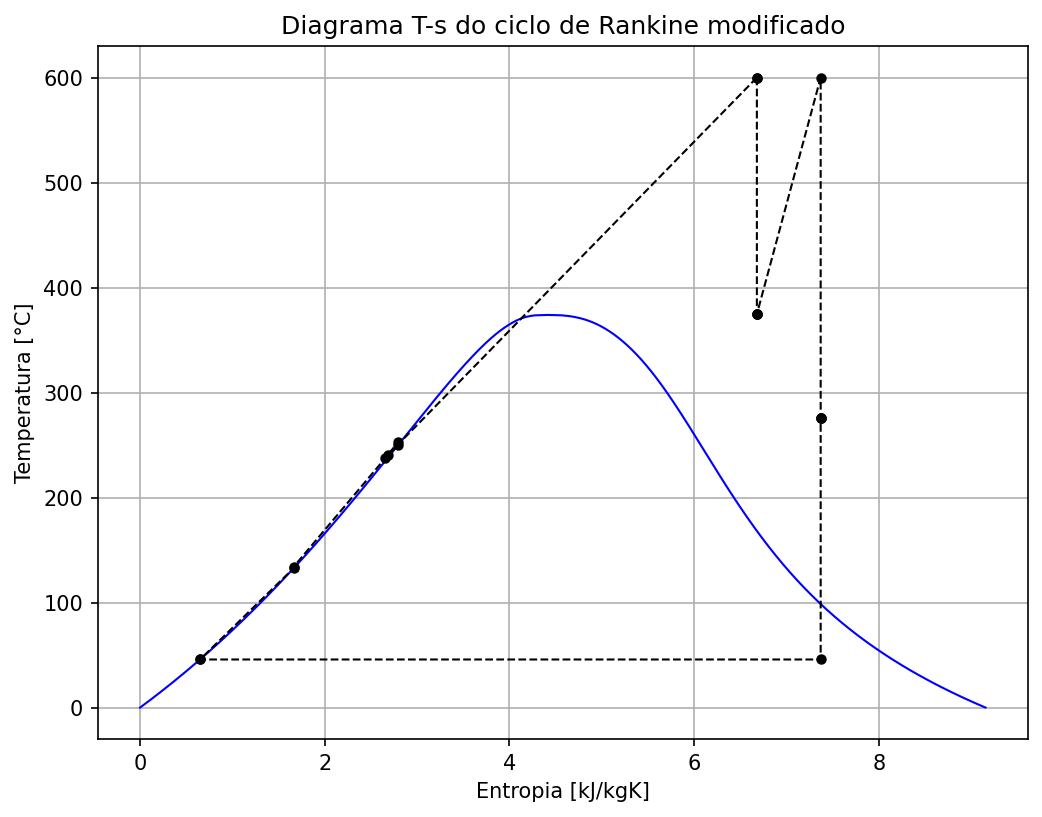

In [59]:
T_min = 273.15  # Temperatura mínima [K]
T_max = 647.095  # Temperatura crítica da água [K]

# Criando um vetor de temperatura
T_values = np.linspace(T_min, T_max, 1000)

# Calculando a entropia de saturação (líquido e vapor)
s_liq = [CP.PropsSI('S', 'T', T, 'Q', 0, fluido_trabalho) / 1000 for T in T_values]
s_vap = [CP.PropsSI('S', 'T', T, 'Q', 1, fluido_trabalho) / 1000 for T in T_values]

# Unificando os valores da curva de saturação
s_values = np.concatenate((s_liq, s_vap[::-1]))
T_values_combined = np.concatenate((T_values, T_values[::-1]))

# Convertendo os dados para arrays NumPy
eixo_x = df['Entropia [kJ/kgK]'].values
eixo_y = df['Temperatura [°C]'].values

# Fechando o ciclo
novo_ponto_T = eixo_y[0]  
novo_ponto_s = eixo_x[0]
eixo_x = np.append(eixo_x, novo_ponto_s)
eixo_y = np.append(eixo_y, novo_ponto_T)

# Plotando o gráfico
plt.figure(dpi=150, figsize=(8,6))
plt.plot(s_values, T_values_combined - 273.15, label='Curva de Saturação (Água)', color='blue', linewidth=1)
plt.plot(eixo_x, eixo_y, 'k--', marker='o', color='black', markersize=4, linewidth=1)
plt.title('Diagrama T-s do ciclo de Rankine modificado')
plt.ylabel('Temperatura [°C]')
plt.xlabel('Entropia [kJ/kgK]')
plt.grid(True)
plt.savefig('diagrama_ts1.png', dpi=500)

1 [ 0.60154217 -0.58360094]
2 [0.44804516 0.30848193]
3 [ 0.31347386 -0.41752916]
0 [-0.68774546  0.81686801]
17 [0.95132252 0.2491673 ]
5 [0.89962009 0.91732904]
6 [0.18659349 0.00664796]
7 [ 0.06759826 -0.83126234]
9 [-0.5527126  -0.44250919]
10 [ 0.9448911  -0.00161755]


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


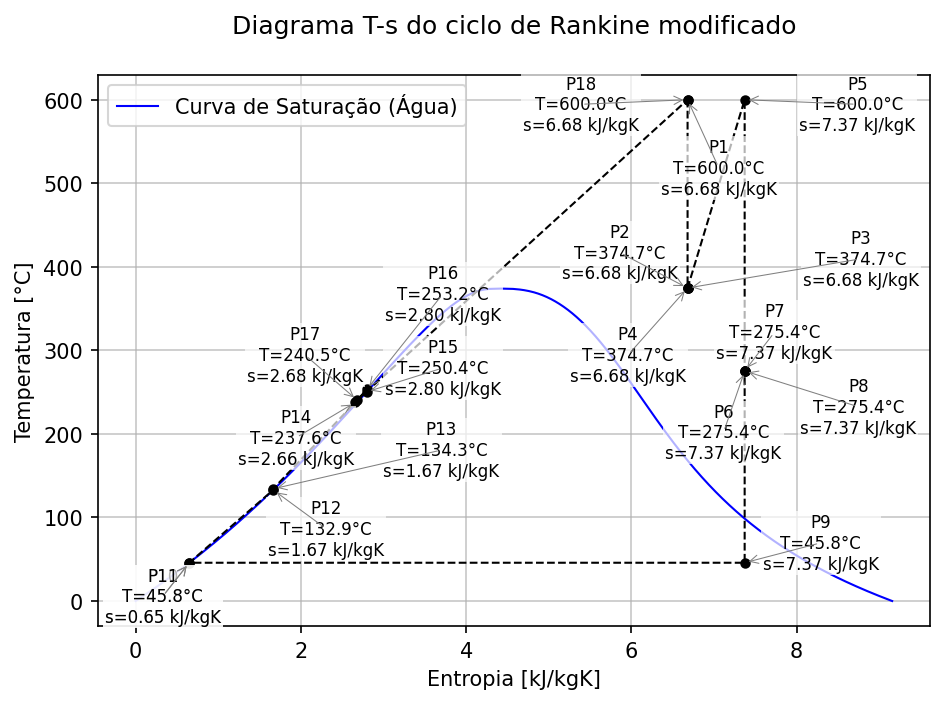

In [60]:
plt.figure(dpi=150)

# Plotar curva de saturação
plt.plot(s_values, T_values_combined - 273.15, 
         label='Curva de Saturação (Água)', 
         color='blue', linewidth=1)

# Plotar ciclo
plt.plot(eixo_x, eixo_y, '--', marker='o', color='black', markersize=4, linewidth=1)

# Lista para armazenar as anotações
texts = []
for i in range(len(eixo_x)):
    x, y = eixo_x[i], eixo_y[i]
    texts.append(
        plt.text(
            x, y,
            f'P{i+1}\nT={y:.1f}°C\ns={x:.2f} kJ/kgK',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
            ha='center', va='center',
            fontsize=8  
        )
    )

# Ajustar automaticamente as posições para evitar sobreposição
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_points=(1.2, 1.2),  
            force_text=0.5)

# Configurações do gráfico
plt.title('Diagrama T-s do ciclo de Rankine modificado', pad=20)
plt.ylabel('Temperatura [°C]')
plt.xlabel('Entropia [kJ/kgK]')
plt.grid(True, alpha=0.7)
plt.legend(loc='best')
plt.tight_layout() 
plt.savefig('diagrama_ts2.png', dpi=500) 
plt.show()

### Análises Paramétricas

A análise paramétrica é uma abordagem essencial para entender como diferentes variáveis operacionais afetam o desempenho de um ciclo de Rankine. No presente estudo, foram avaliadas as influências de pressão e temperatura na turbina, pressão do condensador e eficiência dos equipamentos no rendimento térmico do ciclo.Dessa forma, o objetivo é compreender como essas variáveis impactam na eficiência global do sistema.

In [61]:
m_1, h_1, h_2, eta_th, m_3, h_5, h_3, h_6, m_8, h_8, h_9, h_10, h_11, h_12, h_13, h_15, h_16, h_17, m_4 = sy.symbols('\\dot{m}_1 h_1 h_2 eta_th \\dot{m}_3 h_5 h_3 h_6 \\dot{m}_8 h_8 h_9 h_{10} h_{11} h_{12} h_{13} h_{15} h_{16} h_{17} \\dot{m}_4')

In [62]:
# Escrevendo a equação da eficieência do ciclo em função das entalpias de cada ponto no processo

ent_param = eta_th
sai_param = ((((m_1 * (h_1 - h_2)) + (m_3 * (h_5 - h_6))) + (m_8 * (h_8 - h_9))) - ((m_8 * (h_11 - h_10)) + (m_3 * (h_13 - h_12)) + (m_4 * (h_16 - h_15))))/ ((m_3 * (h_5 - h_3)) + (m_1 * (h_1 - h_17)))
eq_param = sy.Eq(eta_th, sai_param)
eq_param

Eq(eta_th, (\dot{m}_1*(h_1 - h_2) + \dot{m}_3*(h_5 - h_6) - \dot{m}_3*(-h_{12} + h_{13}) - \dot{m}_4*(-h_{15} + h_{16}) + \dot{m}_8*(h_8 - h_9) - \dot{m}_8*(-h_{10} + h_{11}))/(\dot{m}_1*(h_1 - h_{17}) + \dot{m}_3*(-h_3 + h_5)))

In [63]:
dic_param = {m_1:m1_ponto, m_3:m3_ponto, m_4:m4_ponto, m_8:m8_ponto, h_3:h3_conv, h_5:h5_conv, h_9:h9_conv, h_10:h10_conv, h_11:h11_conv, h_12:h12_conv, h_13:h13_conv, h_15:h15_conv, h_16:h16_conv, h17:h17_conv}

In [64]:
eq_param_num = eq_param.subs(dic_param)
eq_param_num

Eq(eta_th, (2.77777777777778*h_1 - 2.77777777777778*h_2 - 2.27777777777778*h_6 + 1.98166666666667*h_8 + 3698.97887255716)/(2.77777777777778*h_1 - 1705.82015746873))

#### Primeira análise: Influência da temperatura de saída da caldeira 1 na eficiência térmica do ciclo.

In [65]:
dic_param_1 = {m_1:m1_ponto, m_3:m3_ponto, m_4:m4_ponto, m_8:m8_ponto, h_2:h2_conv, h_3:h3_conv, h_5:h5_conv, h_6:h6_conv, h_8:h8_conv, h_9:h9_conv, h_10:h10_conv, h_11:h11_conv, h_12:h12_conv, h_13:h13_conv, h_15:h15_conv, h_16:h16_conv, h17:h17_conv}

In [66]:
eq_param_num_1 = eq_param.subs(dic_param_1)
eq_param_num_1

Eq(eta_th, (2.77777777777778*h_1 - 5954.14119853009)/(2.77777777777778*h_1 - 1705.82015746873))

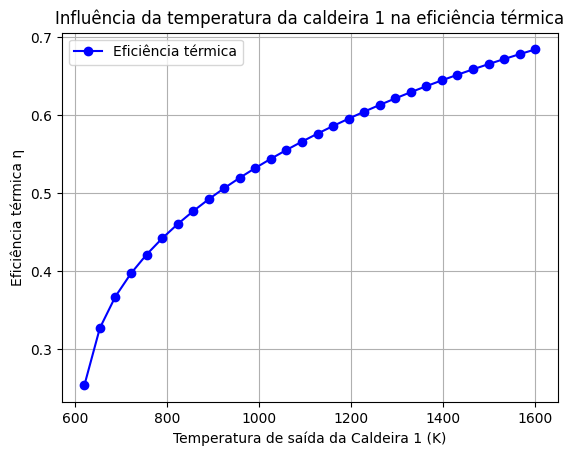

In [67]:
# convertendo a equação para a função numérica com h1 variando
eta_th_1 = sy.lambdify(h_1, eq_param_num_1.rhs, 'numpy')

T_min = 620   # Temperatura mínima em K
T_max = 1600  # Temperatura máxima em K
n_points = 30 

def update_plot(T_min, T_max, n_points):
    plt.close('all')
    T_values = np.linspace(T_min, T_max, n_points)
    h1_values = np.array([CP.PropsSI('H', 'T', T, 'P', p1, fluido_trabalho) / 1e3 for T in T_values])  # J/kg → kJ/kg
    eta_values = eta_th_1(h1_values)

    plt.figure(dpi=100)
    plt.plot(T_values, eta_values, marker='o', linestyle='-', color='b', label="Eficiência térmica")
    plt.xlabel("Temperatura de saída da Caldeira 1 (K)")
    plt.ylabel("Eficiência térmica η")
    plt.title("Influência da temperatura da caldeira 1 na eficiência térmica")
    plt.grid()
    plt.legend()
    plt.savefig('diagrama_tempcald.png', dpi=500)
    plt.show()

update_plot(T_min, T_max, n_points)

O gráfico acima demonstra que a temperatura de saída da caldeira 1 influencia significativamente a eficiência térmica deste ciclo, isso ocorre pois o aumento dessa temperatura amplia a disponibilidade de energia útil para a turbina, melhorando o desempenho do ciclo. Contudo, esse aumento é limitado pelas propriedades dos materiais e pelo risco de deposição de impurezas na caldeira. Além disso, o uso de regeneração contribui para a eficiência ao pré-aquecer a água de alimentação, reduzindo o consumo de calor na caldeira e melhorando a conversão de energia térmica em trabalho.

#### Segunda análise: Influência da pressão de descarga da turbina 1

In [68]:
dic_param_2 = {m_1:m1_ponto, m_3:m3_ponto, m_4:m4_ponto, m_8:m8_ponto, h_1:h1_conv, h_3:h3_conv, h_5:h5_conv, h_6:h6_conv, h_9:h9_conv, h_8:h8_conv, h_10:h10_conv, h_11:h11_conv, h_12:h12_conv, h_13:h13_conv, h_15:h15_conv, h_16:h16_conv, h17:h17_conv}

In [69]:
eq_param_num_2 = eq_param.subs(dic_param_2)
eq_param_num_2

Eq(eta_th, 1.54714011281535 - 0.000336809600818847*h_2)

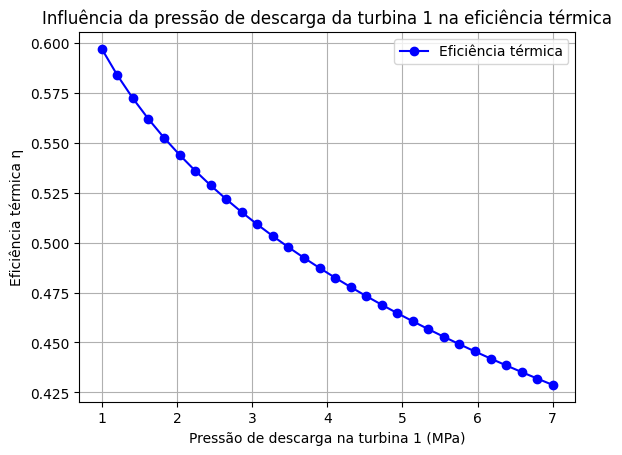

In [70]:
# Convertendo a função para uma expressão numérica
eta_th_2 = sy.lambdify(h_2, eq_param_num_2.rhs, 'numpy')

P2_min = 1.0  # Pressão mínima em MPa
P2_max = 7.0  # Pressão máxima em MPa
n_points = 30  

def update_plot(P2_min, P2_max, n_points):
    P2_values = np.linspace(P2_min * 1e6, P2_max * 1e6, n_points)
    
    h2_values = np.array([CP.PropsSI('H', 'P', P, 'S', s2, fluido_trabalho) / 1000 
                         for P in P2_values])
    
    eta_2_values = eta_th_2(h2_values)
    
    plt.figure(dpi=100)
    plt.plot(P2_values/1e6, eta_2_values, marker='o', linestyle='-', 
            color='b', label="Eficiência térmica")
    plt.xlabel("Pressão de descarga na turbina 1 (MPa)")
    plt.ylabel("Eficiência térmica η")
    plt.title("Influência da pressão de descarga da turbina 1 na eficiência térmica")
    plt.grid(True)
    plt.legend()
    plt.savefig('diagrama_ptur1.png', dpi=500)
    plt.show()

update_plot(P2_min, P2_max, n_points)

#### Terceira análise: Influência da pressão de descarga da turbina 2(1°)

In [71]:
dic_param_3 = {m_1:m1_ponto, m_3:m3_ponto, m_4:m4_ponto, m_8:m8_ponto, h_1:h1_conv, h_2:h2_conv, h_3:h3_conv, h_5:h5_conv, h_9:h9_conv, h_8:h8_conv, h_10:h10_conv, h_11:h11_conv, h_12:h12_conv, h_13:h13_conv, h_15:h15_conv, h_16:h16_conv, h17:h17_conv}

In [72]:
eq_param_num_3 = eq_param.subs(dic_param_3)
eq_param_num_3

Eq(eta_th, 1.31718981431682 - 0.000276183872671455*h_6)

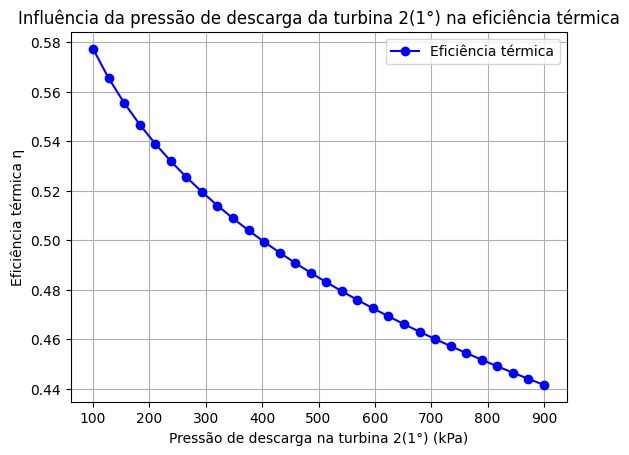

In [73]:
# Convertendo a função para uma expressão numérica
eta_th_3 = sy.lambdify(h_6, eq_param_num_3.rhs, 'numpy')

P6_min = 100  # Pressão mínima em kPa
P6_max = 900  # Pressão máxima em kPa
n_points = 30  

def update_plot(P6_min, P6_max, n_points):
    P6_values = np.linspace(P6_min * 1e3, P6_max * 1e3, n_points)
    
    h6_values = np.array([CP.PropsSI('H', 'P', P, 'S', s6, fluido_trabalho) / 1000 
                         for P in P6_values])
    
    eta_3_values = eta_th_3(h6_values)
    
    plt.figure(dpi=100)
    plt.plot(P6_values/1e3, eta_3_values, marker='o', linestyle='-', 
            color='b', label="Eficiência térmica")
    plt.xlabel("Pressão de descarga na turbina 2(1°) (kPa)")
    plt.ylabel("Eficiência térmica η")
    plt.title("Influência da pressão de descarga da turbina 2(1°) na eficiência térmica")
    plt.grid(True)
    plt.legend()
    plt.savefig('diagrama_ptur21.png', dpi=500)
    plt.show()

update_plot(P6_min, P6_max, n_points)

#### Quarta análise: Influência da pressão de descarga da turbina 2(2°)

In [74]:
dic_param_4 = {m_1:m1_ponto, m_3:m3_ponto, m_4:m4_ponto, m_8:m8_ponto, h_1:h1_conv, h_2:h2_conv, h_3:h3_conv, h_5:h5_conv, h_6:h6_conv, h_8:h8_conv, h_10:h10_conv, h_11:h11_conv, h_12:h12_conv, h_13:h13_conv, h_15:h15_conv, h_16:h16_conv, h17:h17_conv}

In [75]:
eq_param_num_4 = eq_param.subs(dic_param_4)
eq_param_num_4

Eq(eta_th, 1.04608700423894 - 0.000240279969224166*h_9)

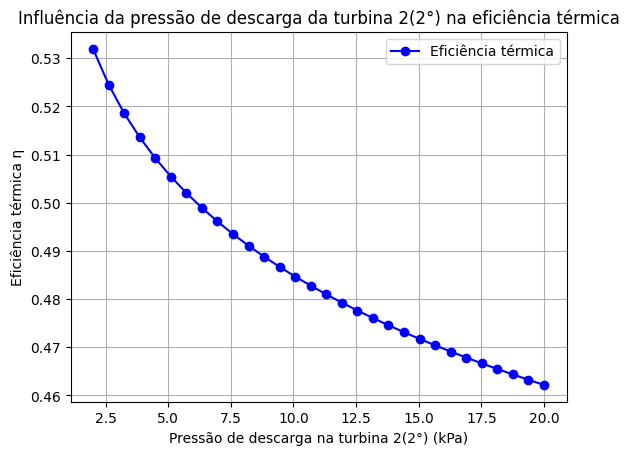

In [76]:
# Convertendo a função para uma expressão numérica
eta_th_4 = sy.lambdify(h_9, eq_param_num_4.rhs, 'numpy')

P9_min = 2  # Pressão mínima em kPa
P9_max = 20  # Pressão máxima em kPa
n_points = 30 

def update_plot(P9_min, P9_max, n_points):
    P9_values = np.linspace(P9_min * 1e3, P9_max * 1e3, n_points)
    
    h9_values = np.array([CP.PropsSI('H', 'P', P, 'S', s9, fluido_trabalho) / 1000 
                         for P in P9_values])
    
    eta_4_values = eta_th_4(h9_values)
    
    plt.figure(dpi=100)
    plt.plot(P9_values/1e3, eta_4_values, marker='o', linestyle='-', 
            color='b', label="Eficiência térmica")
    plt.xlabel("Pressão de descarga na turbina 2(2°) (kPa)")
    plt.ylabel("Eficiência térmica η")
    plt.title("Influência da pressão de descarga da turbina 2(2°) na eficiência térmica")
    plt.grid(True)
    plt.legend()
    plt.savefig('diagrama_ptur22.png', dpi=500)
    plt.show()

update_plot(P9_min, P9_max, n_points)


A pressão de descarga das turbinas tem um papel crucial no aproveitamento da energia do vapor. Conforme é possível ver nos gráficos, reduzir a pressão no condensador aumenta a eficiência do ciclo ao ampliar a queda de entalpia na expansão da turbina. Entretanto, se essa pressão for muito baixa, a umidade do vapor aumenta, podendo comprometer o desempenho e a durabilidade dos componentes mecânicos.

Além disso, a variação na pressão de descarga da primeira turbina (1ª expansão) tem um impacto maior na eficiência do ciclo em comparação com a segunda turbina (2ª expansão - em ambos os estágios). Isso ocorre porque a primeira expansão envolve um maior diferencial de pressão e temperatura, influenciando diretamente o trabalho extraído na fase inicial do processo. Já na segunda turbina, a energia restante do vapor é menor, tornando o efeito da variação da pressão de descarga menos significativo.